In [1]:
import numpy as np
import matplotlib.pyplot as  plt
import math
import sys
import pandas as pd

File Read and Normalization

In [2]:
train = pd.read_csv('pendigits_training.txt', delim_whitespace=True, header=None, dtype=float)
x_train1 = train.iloc[:,:-1]
x_train2 = np.array(x_train1)
x_train3 = x_train2[:,0:(x_train2.shape[1]-1)]
mean = x_train3.mean(axis=0)
std = np.std(x_train3, axis=0)
z = (x_train3 - mean) /std
print(z)

[[ 0.28858794  0.90938369 -0.49537096 ...  2.00458859  1.63145551
  -0.16407123]
 [-1.12198472  0.25645994 -0.49537096 ...  0.63280235 -1.01743997
   1.28070152]
 [-1.12198472 -1.64295463 -0.34301481 ... -1.18149559 -0.32511502
  -0.74198032]
 ...
 [ 1.8792337   0.79067028  0.76156728 ... -0.82748624 -1.07764214
  -1.12725306]
 [ 0.64873415 -1.16810099  1.94232745 ... -0.42922571 -1.04754106
   1.28070152]
 [-1.12198472 -0.39646382 -0.41919288 ... -1.3142491   0.00599692
   1.28070152]]


Concat the last Column and array above

In [3]:
u = train.iloc[:,-1:]
t=np.array(u)
train_data=np.concatenate((z,t),axis=1)
print(train_data)

[[ 2.88587936e-01  9.09383692e-01 -4.95370957e-01 ...  1.63145551e+00
  -1.64071226e-01  8.00000000e+00]
 [-1.12198472e+00  2.56459935e-01 -4.95370957e-01 ... -1.01743997e+00
   1.28070152e+00  2.00000000e+00]
 [-1.12198472e+00 -1.64295463e+00 -3.43014807e-01 ... -3.25115016e-01
  -7.41980323e-01  1.00000000e+00]
 ...
 [ 1.87923370e+00  7.90670281e-01  7.61567281e-01 ... -1.07764214e+00
  -1.12725306e+00  5.00000000e+00]
 [ 6.48734147e-01 -1.16810099e+00  1.94232745e+00 ... -1.04754106e+00
   1.28070152e+00  1.00000000e+00]
 [-1.12198472e+00 -3.96463821e-01 -4.19192882e-01 ...  5.99692021e-03
   1.28070152e+00  7.00000000e+00]]


In [4]:
m = train_data.shape[0]


X = train_data[:,:-1]

X = np.hstack((np.ones((m,1)),X))

y = train_data[:,-1:]
print(y)

[[8.]
 [2.]
 [1.]
 ...
 [5.]
 [1.]
 [7.]]


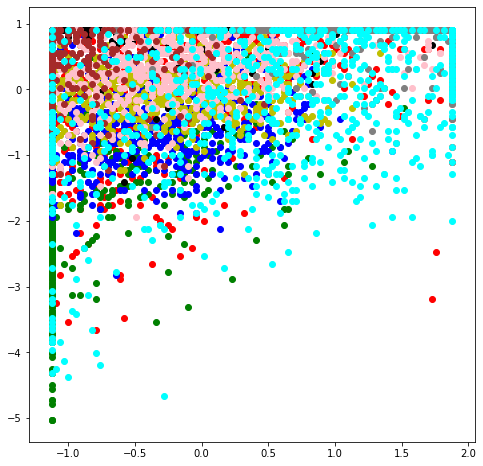

In [5]:
plt.figure(figsize=(8,8))
plt.scatter(X[y[:,0] == 0][:,1], X[y[:,0] == 0][:,2], label='class 0', c='r')
plt.scatter(X[y[:,0] == 1][:,1], X[y[:,0] == 1][:,2], label='class 1', c='g')
plt.scatter(X[y[:,0] == 2][:,1], X[y[:,0] == 2][:,2], label='class 2', c='b')
plt.scatter(X[y[:,0] == 3][:,1], X[y[:,0] == 3][:,2], label='class 3', c='y')
plt.scatter(X[y[:,0] == 4][:,1], X[y[:,0] == 4][:,2], label='class 4', c='black')
plt.scatter(X[y[:,0] == 5][:,1], X[y[:,0] == 5][:,2], label='class 5', c='pink')
plt.scatter(X[y[:,0] == 6][:,1], X[y[:,0] == 6][:,2], label='class 6', c='grey')
plt.scatter(X[y[:,0] == 7][:,1], X[y[:,0] == 7][:,2], label='class 7', c='brown')
plt.scatter(X[y[:,0] == 8][:,1], X[y[:,0] == 8][:,2], label='class 8', c='cyan')


plt.show()

In [6]:
Y = np.zeros((m,10))


k = np.unique(y)
k.sort()


for cls in k.astype(int):
    Y[np.where(y[:,-1] == cls),cls] = 1

Logic for Logistic

(I have shown gradient and cost for 100 iterations and then increased the iterations as my notebook was not able to process huge data)

In [13]:
theta = np.zeros((10,16))


learning_rate = 0.001


no_of_iterations = 100000


cost_arr = np.empty((0,10))


i = 1

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

for i in range(no_of_iterations):
    
  
    lineq = np.dot(X, theta.T)
    h = sigmoid(lineq)
    
    
    cost = -1/m * ((Y * np.log(h)) + ((1-Y) * np.log(1-h)))
    cost = cost.sum(axis = 0)
    cost_arr = np.vstack((cost_arr, cost))
    print("Cost : \n", cost_arr)
    
    
    
    Gradient_Descent = (learning_rate/m) * np.dot((h-Y).T, X)
    print("Gradient_Descent :\n", Gradient_Descent )
    theta = theta - Gradient_Descent  
    print("Theta : \n", theta)
    
    i = i + 1;

Cost : 
 [[0.69314718 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718
  0.69314718 0.69314718 0.69314718 0.69314718]]
Gradient_Descent :
 [[ 3.95916733e-04  1.09322197e-05 -7.69175526e-06  1.17252490e-04
   1.38567421e-04  1.04830904e-04  1.81673302e-04 -7.21162831e-06
   1.29619869e-04 -9.54325876e-05  4.23243955e-06 -7.65543276e-05
  -1.33017677e-04 -8.72261374e-06 -1.71012227e-04  6.93426003e-05]
 [ 3.96050173e-04  8.05626324e-05  1.58024820e-04 -9.89905373e-06
   4.05739334e-05 -6.35654839e-05 -9.34349909e-05 -1.02706900e-04
  -1.31130660e-04 -4.66383373e-05 -8.98334337e-05  2.16833267e-05
   1.90496627e-07  3.60263383e-05  5.75704457e-05 -2.94009324e-05]
 [ 3.95916733e-04  5.37398307e-05  4.39186385e-05 -1.57948464e-05
  -8.78637568e-05 -5.61842109e-05 -5.34693050e-05 -7.08983683e-06
  -2.95651474e-06  1.11549933e-04  5.61298291e-05  1.44083036e-04
   9.91701986e-05  1.13539776e-05  9.33744323e-05 -1.29591592e-04]
 [ 4.04056579e-04  3.54239772e-05  3.17969417e-06 -5.9013969

Gradient_Descent :
 [[ 3.93646567e-04  1.12060355e-05 -6.99794566e-06  1.14408377e-04
   1.35159139e-04  1.02220025e-04  1.77584148e-04 -7.67441980e-06
   1.26837935e-04 -9.41621062e-05  4.52274747e-06 -7.49541957e-05
  -1.29421195e-04 -7.71263451e-06 -1.67294519e-04  6.84227965e-05]
 [ 3.93779225e-04  7.90462273e-05  1.55871837e-04 -9.34252997e-06
   4.07136244e-05 -6.17431299e-05 -9.15114319e-05 -1.00651923e-04
  -1.28613353e-04 -4.57224010e-05 -8.79910171e-05  2.13000409e-05
  -1.03464243e-07  3.50452775e-05  5.60439957e-05 -2.91925891e-05]
 [ 3.93646560e-04  5.29244115e-05  4.34446377e-05 -1.47213583e-05
  -8.59929803e-05 -5.45466780e-05 -5.15860855e-05 -6.83381407e-06
  -2.34114152e-06  1.09762058e-04  5.48556366e-05  1.41787149e-04
   9.69696342e-05  1.04979900e-05  9.19373189e-05 -1.27702545e-04]
 [ 4.01739710e-04  3.52090837e-05  2.70523144e-06 -5.76014062e-05
  -8.05565822e-05 -9.67688998e-05 -6.69187334e-05 -3.89387886e-05
  -4.83694882e-05 -6.52979697e-05 -3.02436308e-05 -7.

 [[0.69314718 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718
  0.69314718 0.69314718 0.69314718 0.69314718]
 [0.69282974 0.69290047 0.6928998  0.6929185  0.69292045 0.69294809
  0.6928911  0.69292205 0.69295559 0.69292109]
 [0.6925127  0.69265398 0.69265263 0.69269001 0.69269389 0.69274912
  0.69263522 0.69269709 0.69276411 0.69269516]
 [0.69219606 0.69240771 0.69240569 0.69246169 0.6924675  0.69255027
  0.69237955 0.69247231 0.69257275 0.69246939]
 [0.69187981 0.69216166 0.69215898 0.69223356 0.69224128 0.69235155
  0.69212408 0.6922477  0.69238149 0.69224378]
 [0.69156395 0.69191584 0.69191248 0.6920056  0.69201524 0.69215294
  0.69186882 0.69202326 0.69219035 0.69201834]
 [0.69124848 0.69167024 0.69166621 0.69177782 0.69178936 0.69195446
  0.69161376 0.69179901 0.69199932 0.69179306]
 [0.69093341 0.69142486 0.69142016 0.69155023 0.69156364 0.6917561
  0.6913589  0.69157492 0.69180841 0.69156794]
 [0.69061873 0.69117969 0.69117433 0.69132281 0.6913381  0.69155787
  0.69110424

 [[0.69314718 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718
  0.69314718 0.69314718 0.69314718 0.69314718]
 [0.69282974 0.69290047 0.6928998  0.6929185  0.69292045 0.69294809
  0.6928911  0.69292205 0.69295559 0.69292109]
 [0.6925127  0.69265398 0.69265263 0.69269001 0.69269389 0.69274912
  0.69263522 0.69269709 0.69276411 0.69269516]
 [0.69219606 0.69240771 0.69240569 0.69246169 0.6924675  0.69255027
  0.69237955 0.69247231 0.69257275 0.69246939]
 [0.69187981 0.69216166 0.69215898 0.69223356 0.69224128 0.69235155
  0.69212408 0.6922477  0.69238149 0.69224378]
 [0.69156395 0.69191584 0.69191248 0.6920056  0.69201524 0.69215294
  0.69186882 0.69202326 0.69219035 0.69201834]
 [0.69124848 0.69167024 0.69166621 0.69177782 0.69178936 0.69195446
  0.69161376 0.69179901 0.69199932 0.69179306]
 [0.69093341 0.69142486 0.69142016 0.69155023 0.69156364 0.6917561
  0.6913589  0.69157492 0.69180841 0.69156794]
 [0.69061873 0.69117969 0.69117433 0.69132281 0.6913381  0.69155787
  0.69110424

 [[ 3.89439313e-04  1.16892675e-05 -5.75527223e-06  1.09273119e-04
   1.29002827e-04  9.75155140e-05  1.70201706e-04 -8.48995545e-06
   1.21818614e-04 -9.18499296e-05  5.05096340e-06 -7.20615434e-05
  -1.22927752e-04 -5.90747203e-06 -1.60582330e-04  6.67520931e-05]
 [ 3.89570159e-04  7.62856083e-05  1.51946679e-04 -8.35241957e-06
   4.09384153e-05 -5.84464764e-05 -8.80385109e-05 -9.69186962e-05
  -1.24051099e-04 -4.40547814e-05 -8.46375149e-05  2.06057957e-05
  -6.12802305e-07  3.32715669e-05  5.32943081e-05 -2.88078750e-05]
 [ 3.89439130e-04  5.14368831e-05  4.25841386e-05 -1.27972628e-05
  -8.26136750e-05 -5.15902507e-05 -4.81913719e-05 -6.37618876e-06
  -1.24706860e-06  1.06504965e-04  5.25329206e-05  1.37607672e-04
   9.29908324e-05  8.95588860e-06  8.93508874e-05 -1.24252258e-04]
 [ 3.97445302e-04  3.48205620e-05  1.85857479e-06 -5.50465098e-05
  -7.80558394e-05 -9.43398207e-05 -6.32993536e-05 -3.74377794e-05
  -4.48314678e-05 -6.38141876e-05 -2.86666600e-05 -7.52122497e-05
   6.1

  -3.69554959e-05 -2.96981687e-05  5.07542563e-05  5.60864743e-05]]
Theta : 
 [[-3.13626716e-02 -9.11238950e-04  5.21836488e-04 -8.99552330e-03
  -1.06243316e-02 -8.03366388e-03 -1.39808202e-02  6.38853330e-04
  -9.99344657e-03  7.46216043e-03 -3.77995743e-04  5.90780576e-03
   1.01549869e-02  5.61822127e-04  1.31781594e-02 -5.42266914e-03]
 [-3.13732278e-02 -6.23915506e-03 -1.23495247e-02  7.17145243e-04
  -3.26389138e-03  4.83855022e-03  7.21463879e-03  7.93784698e-03
   1.01494084e-02  3.60672133e-03  6.93658324e-03 -1.68275199e-03
   2.38029075e-05 -2.74933730e-03 -4.39939340e-03  2.32361007e-03]
 [-3.13626653e-02 -4.18838962e-03 -3.44922550e-03  1.11886827e-03
   6.77602220e-03  4.27326385e-03  4.02301893e-03  5.32714469e-04
   1.53858899e-04 -8.68121085e-03 -4.31731010e-03 -1.12149777e-02
  -7.63579769e-03 -7.92658641e-04 -7.27586028e-03  1.01105083e-02]
 [-3.20074483e-02 -2.80483610e-03 -1.90537909e-04  4.52991651e-03
   6.36799234e-03  7.66716651e-03  5.24274761e-03  3.06916015

 [[0.69314718 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718
  0.69314718 0.69314718 0.69314718 0.69314718]
 [0.69282974 0.69290047 0.6928998  0.6929185  0.69292045 0.69294809
  0.6928911  0.69292205 0.69295559 0.69292109]
 [0.6925127  0.69265398 0.69265263 0.69269001 0.69269389 0.69274912
  0.69263522 0.69269709 0.69276411 0.69269516]
 [0.69219606 0.69240771 0.69240569 0.69246169 0.6924675  0.69255027
  0.69237955 0.69247231 0.69257275 0.69246939]
 [0.69187981 0.69216166 0.69215898 0.69223356 0.69224128 0.69235155
  0.69212408 0.6922477  0.69238149 0.69224378]
 [0.69156395 0.69191584 0.69191248 0.6920056  0.69201524 0.69215294
  0.69186882 0.69202326 0.69219035 0.69201834]
 [0.69124848 0.69167024 0.69166621 0.69177782 0.69178936 0.69195446
  0.69161376 0.69179901 0.69199932 0.69179306]
 [0.69093341 0.69142486 0.69142016 0.69155023 0.69156364 0.6917561
  0.6913589  0.69157492 0.69180841 0.69156794]
 [0.69061873 0.69117969 0.69117433 0.69132281 0.6913381  0.69155787
  0.69110424

  0.66898988 0.67188771 0.67489402 0.67174024]]
Gradient_Descent :
 [[ 3.86341131e-04  1.20253288e-05 -4.87522876e-06  1.05602985e-04
   1.24600930e-04  9.41611915e-05  1.64925835e-04 -9.05646214e-06
   1.18233665e-04 -9.01828650e-05  5.43135225e-06 -6.99918727e-05
  -1.18287133e-04 -4.63256278e-06 -1.55785150e-04  6.55504451e-05]
 [ 3.86470007e-04  7.42937404e-05  1.49109300e-04 -7.65684372e-06
   4.10762808e-05 -5.60848593e-05 -8.55559462e-05 -9.42314435e-05
  -1.20775595e-04 -4.28513654e-05 -8.22181698e-05  2.01079929e-05
  -9.59371647e-07  3.20020250e-05  5.13340455e-05 -2.85259952e-05]
 [ 3.86340506e-04  5.03604462e-05  4.19648715e-05 -1.14341151e-05
  -8.01974007e-05 -4.94773288e-05 -4.57701337e-05 -6.05254156e-06
  -4.79646806e-07  1.04152947e-04  5.08541926e-05  1.34591421e-04
   9.01425597e-05  7.85598930e-06  8.75095361e-05 -1.21752877e-04]
 [ 3.94281897e-04  3.45420745e-05  1.26168631e-06 -5.32164612e-05
  -7.62660572e-05 -9.25991841e-05 -6.07143011e-05 -3.63617184e-05
  -4.

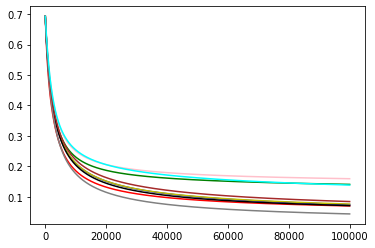

In [12]:
plt.plot(cost_arr[:,0], label='class 0', c='r')
plt.plot(cost_arr[:,1], label='class 1', c='g')
plt.plot(cost_arr[:,2], label='class 2', c='b')
plt.plot(cost_arr[:,3], label='class 3', c='y')
plt.plot(cost_arr[:,4], label='class 4', c='black')
plt.plot(cost_arr[:,5], label='class 5', c='pink')
plt.plot(cost_arr[:,6], label='class 6', c='grey')
plt.plot(cost_arr[:,7], label='class 7', c='brown')
plt.plot(cost_arr[:,8], label='class 8', c='cyan')

plt.show()

Decision Boundary

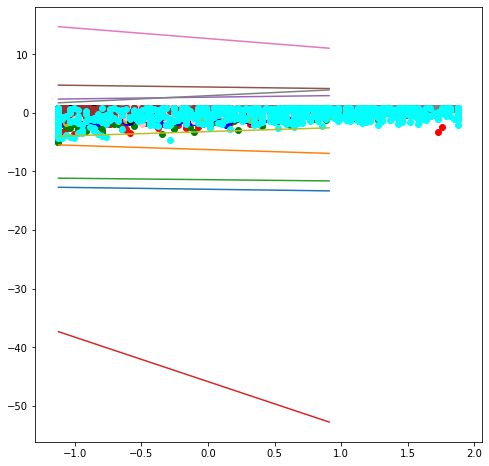

In [9]:
plot_x = np.array([min(X[:,1]),max(X[:,2])])
plot_y0 = -1/theta[0,2] * ((theta[0,1] * plot_x) + theta[0,0])
plot_y1 = -1/theta[1,2] * ((theta[1,1] * plot_x) + theta[1,0])
plot_y2 = -1/theta[2,2] * ((theta[2,1] * plot_x) + theta[2,0])
plot_y3 = -1/theta[3,2] * ((theta[3,1] * plot_x) + theta[3,0])
plot_y4 = -1/theta[4,2] * ((theta[4,1] * plot_x) + theta[4,0])
plot_y5 = -1/theta[5,2] * ((theta[5,1] * plot_x) + theta[5,0])
plot_y6 = -1/theta[6,2] * ((theta[6,1] * plot_x) + theta[6,0])
plot_y7 = -1/theta[7,2] * ((theta[7,1] * plot_x) + theta[7,0])
plot_y8 = -1/theta[8,2] * ((theta[8,1] * plot_x) + theta[8,0])

plt.figure(figsize=(8,8))
plt.scatter(X[y[:,0] == 0][:,1], X[y[:,0] == 0][:,2], label='class 0', c='r')
plt.scatter(X[y[:,0] == 1][:,1], X[y[:,0] == 1][:,2], label='class 1', c='g')
plt.scatter(X[y[:,0] == 2][:,1], X[y[:,0] == 2][:,2], label='class 2', c='b')
plt.scatter(X[y[:,0] == 3][:,1], X[y[:,0] == 3][:,2], label='class 3', c='y')
plt.scatter(X[y[:,0] == 4][:,1], X[y[:,0] == 4][:,2], label='class 4', c='black')
plt.scatter(X[y[:,0] == 5][:,1], X[y[:,0] == 5][:,2], label='class 5', c='pink')
plt.scatter(X[y[:,0] == 6][:,1], X[y[:,0] == 6][:,2], label='class 6', c='grey')
plt.scatter(X[y[:,0] == 7][:,1], X[y[:,0] == 7][:,2], label='class 7', c='brown')
plt.scatter(X[y[:,0] == 8][:,1], X[y[:,0] == 8][:,2], label='class 8', c='cyan')
plt.plot(plot_x,plot_y0)
plt.plot(plot_x,plot_y1)
plt.plot(plot_x,plot_y2)
plt.plot(plot_x,plot_y3)
plt.plot(plot_x,plot_y4)
plt.plot(plot_x,plot_y5)
plt.plot(plot_x,plot_y6)
plt.plot(plot_x,plot_y7)
plt.plot(plot_x,plot_y8)
plt.show()

Test Data Set

In [10]:
test = pd.read_csv('pendigits_test.txt', delim_whitespace=True, header=None, dtype=float)
x_test1 = test.iloc[:,:-1]
x_test2 = np.array(x_test1)
x_test3 = x_test2[:,0:(x_test2.shape[1]-1)]
mean = x_test3.mean(axis=0)
std = np.std(x_test3, axis=0)
x_test = (x_test3 - mean) /std
print(x_test)


[[ 1.28151934  0.40279027 -1.50631414 ... -0.63070902  0.96904398
   1.2242467 ]
 [ 1.05923628  0.9457161  -0.90214333 ... -0.63070902  0.8475847
   0.18228507]
 [-1.1635943   0.53852173 -1.24198941 ...  2.03686314  2.03181265
  -0.71759089]
 ...
 [ 0.39238711  0.9457161  -0.56229726 ...  1.71491478  1.81925891
  -0.24397197]
 [-0.63567204  0.9457161  -1.58183549 ...  0.28914345  1.94071819
  -0.90703846]
 [-0.10774977  0.9457161  -0.18469051 ...  1.39296641 -0.21518396
   0.39541358]]


Concat last column of test_data and above normalized test data

In [11]:
uv = test.iloc[:,-1:]
st=np.array(uv)
test_data=np.concatenate((x_test,st),axis=1)
print(test_data)

[[ 1.28151934  0.40279027 -1.50631414 ...  0.96904398  1.2242467
   8.        ]
 [ 1.05923628  0.9457161  -0.90214333 ...  0.8475847   0.18228507
   8.        ]
 [-1.1635943   0.53852173 -1.24198941 ...  2.03181265 -0.71759089
   8.        ]
 ...
 [ 0.39238711  0.9457161  -0.56229726 ...  1.81925891 -0.24397197
   0.        ]
 [-0.63567204  0.9457161  -1.58183549 ...  1.94071819 -0.90703846
   0.        ]
 [-0.10774977  0.9457161  -0.18469051 ... -0.21518396  0.39541358
   4.        ]]


Test Data 

In [27]:
test_m = test_data.shape[0]


test_X = test_data[:,:-1]


test_X = np.hstack((np.ones((test_m,1)),test_X))


test_y = test_data[:,-1:]

 
pred = np.zeros((test_m,10))
model_predict = sigmoid(np.dot(test_X, theta.T))
pred[model_predict > 0.5] = 1


predict = np.zeros((test_m,1))
predict[pred[:,1] == 1] = 1
predict[pred[:,2] == 1] = 2
predict[pred[:,0] == 1] = 0
predict[pred[:,3] == 1] = 3
predict[pred[:,4] == 1] = 4
predict[pred[:,5] == 1] = 5
predict[pred[:,6] == 1] = 6
predict[pred[:,7] == 1] = 7
predict[pred[:,8] == 1] = 8
predict[pred[:,9] == 1] = 9


Accuracy in terms of 0 or 1

In [31]:
for i in range(len(test_y)):
    ACCURACY=0
    if test_y[i]==predict[i]:
        ACCURACY=1
    else:
        ACCURACY=0
    print("Object ID = %5d, output = %14.4f, target value = %10.4f, Accuracy = %4d" % (i+1, predict[i], test_y[i], ACCURACY))
    
    
    
    
    

Object ID =     1, output =         0.0000, target value =     8.0000, Accuracy =    0
Object ID =     2, output =         8.0000, target value =     8.0000, Accuracy =    1
Object ID =     3, output =         0.0000, target value =     8.0000, Accuracy =    0
Object ID =     4, output =         9.0000, target value =     9.0000, Accuracy =    1
Object ID =     5, output =         0.0000, target value =     9.0000, Accuracy =    0
Object ID =     6, output =         5.0000, target value =     1.0000, Accuracy =    0
Object ID =     7, output =         4.0000, target value =     4.0000, Accuracy =    1
Object ID =     8, output =         1.0000, target value =     7.0000, Accuracy =    0
Object ID =     9, output =         9.0000, target value =     9.0000, Accuracy =    1
Object ID =    10, output =         9.0000, target value =     9.0000, Accuracy =    1
Object ID =    11, output =         9.0000, target value =     9.0000, Accuracy =    1
Object ID =    12, output =         0.0000,

Object ID =  2065, output =         6.0000, target value =     6.0000, Accuracy =    1
Object ID =  2066, output =         0.0000, target value =     8.0000, Accuracy =    0
Object ID =  2067, output =         8.0000, target value =     6.0000, Accuracy =    0
Object ID =  2068, output =         6.0000, target value =     6.0000, Accuracy =    1
Object ID =  2069, output =         3.0000, target value =     3.0000, Accuracy =    1
Object ID =  2070, output =         6.0000, target value =     6.0000, Accuracy =    1
Object ID =  2071, output =         0.0000, target value =     0.0000, Accuracy =    1
Object ID =  2072, output =         9.0000, target value =     5.0000, Accuracy =    0
Object ID =  2073, output =         9.0000, target value =     9.0000, Accuracy =    1
Object ID =  2074, output =         6.0000, target value =     6.0000, Accuracy =    1
Object ID =  2075, output =         3.0000, target value =     3.0000, Accuracy =    1
Object ID =  2076, output =         1.0000,

Compared my model with the libraries output
(The below warning is due to large number of iterations.)

In [14]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, explained_variance_score

#train the model with training data
regr = linear_model.LogisticRegression()
regr.fit(X,y.reshape(m))


sklearn_predict = regr.predict(test_X)

print('Sklearn')

print('Coefficients: {}'.format(regr.coef_))


print("Mean squared error: %.4f \n" % mean_squared_error(sklearn_predict, test_y))


print('Variance score: %.2f \n' % explained_variance_score(test_y, sklearn_predict))

print('\n')

print('My Model')

print('Coefficients: {}'.format(theta))


print("Mean squared error: %.4f \n" % mean_squared_error(predict, test_y))

print('Variance score: %.2f \n' % explained_variance_score(test_y, predict))


Sklearn
Coefficients: [[ 2.88435630e-02  1.77606591e+00 -1.36492533e+00 -7.74362525e-01
  -1.74303146e+00 -2.37969505e+00 -9.74097616e-01 -5.80663644e-01
  -2.39327284e-01  2.00800159e+00 -4.14334801e-02  4.82758561e-01
  -1.32486914e+00  8.10818604e-01  3.60384787e+00 -1.62682843e+00]
 [ 5.41391942e-02 -6.91954394e-01 -8.58597310e-01  5.59704899e-01
  -1.60012238e+00 -1.05687807e+00  1.69662511e+00  1.05451940e+00
   6.82060576e-01  3.71966269e-01 -7.61700509e-01 -1.18992620e+00
   2.19853026e+00 -5.71771094e-01 -3.87932013e+00  1.49996300e+00]
 [-2.25783532e-01 -6.27774347e-01 -4.28659139e-01 -1.58335256e+00
   2.19435223e+00  1.88571170e+00 -1.56027513e-01  3.27876918e+00
  -1.07460741e+00 -3.53448906e+00  2.35626355e+00 -7.06458863e-01
   1.93102063e-01 -3.20153995e-01 -5.13418787e+00  4.18640805e+00]
 [-4.98505808e-02 -1.82232386e+00  1.16628592e-01 -8.84571732e-01
   3.20032717e+00  3.18104857e+00  1.51649803e-01  1.06464962e+00
  -3.34353364e+00  1.48454076e+00  2.16068529e+00 -

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
